# Processo de Construção, Treinamento, Avaliação e Seleção de Modelos Para CLassificação Para Pacientes com doença Hepática

Tem aumentado de forma contínua o número de pacientes com doença hepática devido ao consumo excessivo de álcool, inalação de gases nocivos, ingestão de alimentos contaminados e uso de drogas e anabolizantes. 

Neste mini-projeto vamos construir um modelo de Machine Learning capaz de prever se um paciente vai ou não desenvolver uma doença hepática com base em diversas características do  paciente. Esse  modelo  pode  ajudar  médicos,  hospitais ou  governos  a  planejar  melhor  o orçamento de gastos de saúde ou mesmo criar políticas de prevenção.

Como   nosso  objetivo   é   prever   uma   classe   (sim   ou   não),   usaremos aprendizado supervisionadopara   classificação,  criando   diferentes   versões   do   modelo   com   diferentes algoritmos e passaremos por todo o processo de Machine Learning de ponta a ponta.Usaremos como fonte de dados o dataset disponível no link abaixo:

https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)

Este  conjunto  de  dados contém  registros  de  pacientes  hepáticos  e  registros  de  pacientes  não hepáticos  coletados na Índia.  A coluna  "Dataset"  é  um  rótulo  de  classe  usado  para  dividir  os grupos em paciente hepático (que tem a doença hepática) ou não (sem doença).

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


In [2]:
# Imports

# salvar o modelo
import joblib
import pickle
# Manipular os dados
import numpy as np
import pandas as pd

# Visualização
import seaborn as sns
from matplotlib import pyplot as plt
# model selection
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
# Regessao ligistica
from sklearn.linear_model import LogisticRegression
# Randon FOrest
from sklearn.ensemble import RandomForestClassifier
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Decision tree
from sklearn.tree import DecisionTreeClassifier
# Suport vector clasifier
from sklearn.svm import SVC
# Calcular as métricas  para escolher o melhor modelo
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Lucas Castro" --iversions

Author: Lucas Castro

numpy     : 1.20.3
sklearn   : 1.1.1
seaborn   : 0.11.2
pandas    : 1.3.4
matplotlib: 3.4.3
joblib    : 1.1.0



## Carregando o Conjunto de dados

In [4]:
# Carrega os dados
dados = pd.read_csv("dados/dataset.csv")

In [5]:
dados.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
# Colunas
dados.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [7]:
# Shape
dados.shape

(583, 11)

## Análise Exploratória de Dados

In [8]:
# Tipos de dados
dados.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [9]:
# Variáveis categóricas
dados.dtypes[dados.dtypes == 'object']

Gender    object
dtype: object

In [10]:
# Variáveis não categóricas
dados.dtypes[dados.dtypes != 'object']

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

### Exploração das Variáveis Numéricas

In [11]:
dados.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


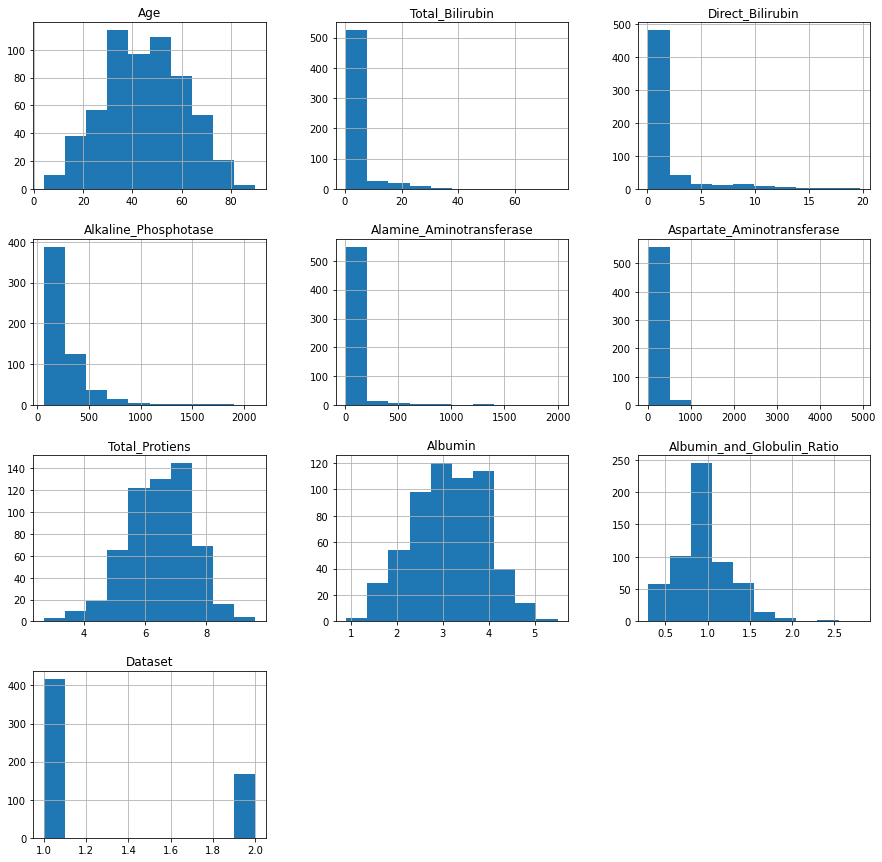

In [12]:
# Plot 
dados.hist(figsize = (15,15), bins = 10) 
plt.show()

Parece que há outlier nas variáveis **Alamine_Aminotransferase**, **Aspartate_Aminotransferase**, pois o valor máximo é muito mais alto que o valor médio.

A coluna dataset (variável target) tem '1' para doença hepática e '2' para nenhuma doença hepática. Vamos ajustar a variável colocando valores mais fáceis de interpretar. A classe negativa (não tem a doença) será zero.

In [13]:
# Função para ajustar a variável target
def ajusta_var(x):
    if x == 2:
        return 0
    return 1

In [14]:
# Aplica a função
dados['Dataset'] = dados['Dataset'].map(ajusta_var)

In [15]:
# Vamos ajustar o nome da variável target
dados.rename({'Dataset':'Target'}, axis = 'columns', inplace = True)

In [16]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
103,55,Female,0.8,0.2,225,14,23,6.1,3.3,1.2,0
173,31,Male,0.6,0.1,175,48,34,6.0,3.7,1.6,1
43,50,Male,2.6,1.2,415,407,576,6.4,3.2,1.0,1
304,55,Female,0.8,0.2,155,21,17,6.9,3.8,1.4,1
371,33,Male,0.8,0.2,135,30,29,7.2,4.4,1.5,0


In [17]:
# Correlação entre as variáveis
dados.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131
Target,0.137351,0.220208,0.246046,0.184866,0.163416,0.151934,-0.035008,-0.161388,-0.163131,1.000000


# Exploração da Variável categórica

In [18]:
dados.describe(include = ['object'])

,Gender
count,583
unique,2
top,Male
freq,441


Número de pacientes do sexo masculino:  441
Número de pacientes do sexo feminino:  142


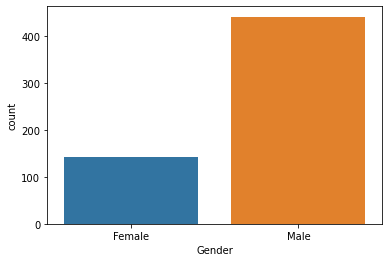

In [19]:
# Plot
sns.countplot(data = dados, x = 'Gender', label = 'Count')

# Value counts
M, F = dados['Gender'].value_counts()

# Print
print('Número de pacientes do sexo masculino: ', M)
print('Número de pacientes do sexo feminino: ', F)

Vamos aproveitar e já transformar a variável categórica em sua representação numérica usando label encoding. Além de reduzir o trabalho mais tarde, facilitará a criação de gráficos a seguir.

In [20]:
# Função para label encoding
def encoding_func(x):
    if x == 'Male':
        return 0
    return 1

In [21]:
# Aplica a função
dados['Gender'] = dados['Gender'].map(encoding_func)

In [22]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
237,35,1,0.9,0.3,158,20,16,8.0,4.0,1.00,1
98,18,0,0.6,0.1,265,97,161,5.9,3.1,1.10,1
46,21,0,3.9,1.8,150,36,27,6.8,3.9,1.34,1
515,49,0,3.9,2.1,189,65,181,6.9,3.0,0.70,1
174,31,0,0.6,0.1,175,48,34,6.0,3.7,1.60,1


### Verificando a Relação Entre Atributos

In [23]:
dados.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


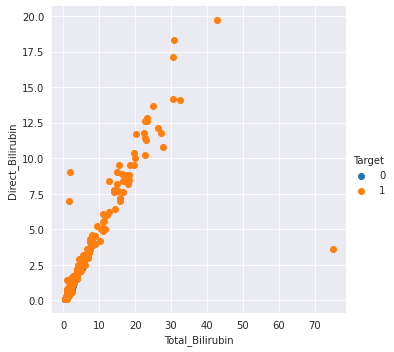

In [24]:
# Define o estilo do background
sns.set_style('darkgrid')  

# Facetgrid
sns.FacetGrid(dados, hue = 'Target', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend();

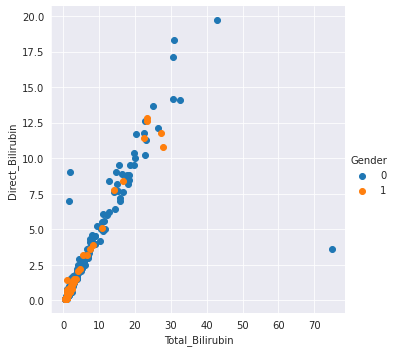

In [25]:
# Define o estilo do background
sns.set_style('darkgrid')  

# Facetgrid
sns.FacetGrid(dados, hue = 'Gender', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend();

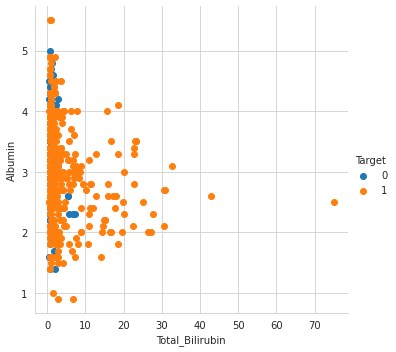

In [26]:
# Define o estilo do background
sns.set_style('whitegrid') 

# Facetgrid
sns.FacetGrid(dados, hue = 'Target', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend();

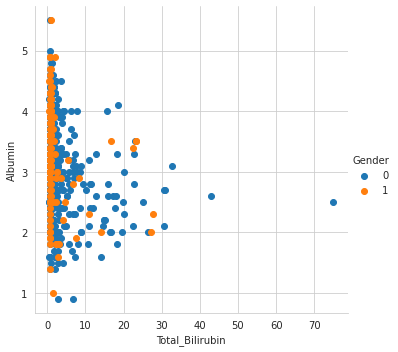

In [27]:
# Define o estilo do background
sns.set_style('whitegrid') 

# Facetgrid
sns.FacetGrid(dados, hue = 'Gender', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

### Verificando Valores Ausentes e Registros Duplicados

In [28]:
# Verificando valores ausentes
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [29]:
# Verificando registros duplicados (complete cases)
# Complete cases também se refere a linhas onde não há valores ausentes
dados[dados.duplicated(keep = False)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
18,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
34,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
54,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1


## Limpeza de Dados

### Tratamento de Registros Duplicados

In [30]:
dados.shape

(583, 11)

In [31]:
# Remove registros duplicados (remove uma das duplicatas)
dados = dados.drop_duplicates()
print(dados.shape)

(570, 11)


### Tratamento de Outliers

In [32]:
dados.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,566.000000,570.000000
mean,44.849123,0.245614,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,0.712281
std,16.242182,0.430829,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.319635,0.453097
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


<AxesSubplot:xlabel='Alamine_Aminotransferase'>

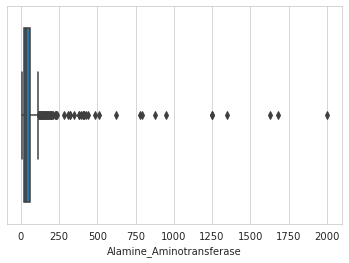

In [33]:
# Boxplot
sns.boxplot(dados.Alamine_Aminotransferase)

Será que os valores extremos são mesmo outliers?

In [34]:
# Contagem de frequência por valor
dados.Alamine_Aminotransferase.sort_values(ascending = False).head()

117    2000
27     1680
47     1630
118    1350
135    1250
Name: Alamine_Aminotransferase, dtype: int64

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

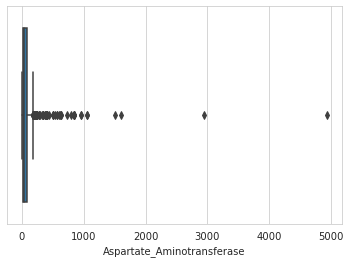

In [35]:
# Boxplot
sns.boxplot(dados.Aspartate_Aminotransferase)

In [36]:
# Contagem de frequência por valor
dados.Aspartate_Aminotransferase.sort_values(ascending = False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [37]:
# Mantém somente os registros onde o valor for menor ou igual a 3000
dados = dados[dados.Aspartate_Aminotransferase <= 3000]
dados.shape

(569, 11)

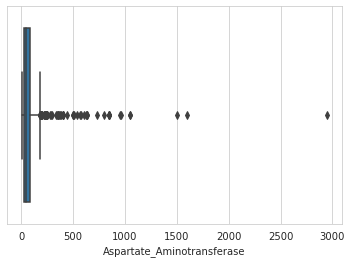

In [38]:
# Boxplot
sns.boxplot(dados.Aspartate_Aminotransferase);

In [39]:
# Contagem de frequência por valor
dados.Aspartate_Aminotransferase.sort_values(ascending = False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [40]:
# Mantém somente os registros onde o valor for menor ou igual a 2500
dados = dados[dados.Aspartate_Aminotransferase <= 2500]
dados.shape

(568, 11)

In [41]:
dados.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,564.000000,568.000000
mean,44.834507,0.246479,3.291197,1.482042,290.482394,74.286972,95.901408,6.496831,3.150000,0.948174,0.711268
std,16.237569,0.431340,6.257583,2.826056,243.271522,155.240601,171.956479,1.089500,0.797571,0.319301,0.453573
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,175.750000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,1680.000000,1600.000000,9.600000,5.500000,2.800000,1.000000


### Tratamento de Valores Ausentes

In [42]:
# Verifica se há valor ausente
dados.isnull().values.any()

True

In [43]:
# Verifica quantas colunas tem valor ausente
dados.isnull().values.any().sum()

1

In [44]:
# Lista os valores ausentes
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [45]:
dados.shape

(568, 11)

In [46]:
# Drop dos registros com valores ausentes em qualquer coluna (any)
dados = dados.dropna(how = 'any')  

In [47]:
dados.shape

(564, 11)

In [48]:
# Lista os valores ausentes
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target


In [49]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
6,26,1,0.9,0.2,154,16,12,7.0,3.5,1.0,1
166,55,0,75.0,3.6,332,40,66,6.2,2.5,0.6,1
471,49,1,0.6,0.1,185,17,26,6.6,2.9,0.7,0
576,32,0,15.0,8.2,289,58,80,5.3,2.2,0.7,1
506,56,0,17.7,8.8,239,43,185,5.6,2.4,0.7,1


## Pré-Processamento de Dados Para Construção de Modelos de Machine Learning

In [50]:
# Data a alta correlação entre as variáveis Direct_Bilirubin e Total_Bilirubin, vamos remover Direct_Bilirubin
dados = dados.drop('Direct_Bilirubin', 1)

In [51]:
dados.shape

(564, 10)

### Divisão em Treino e Teste

In [52]:
dados.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,1,0.7,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,195,27,59,7.3,2.4,0.40,1


In [53]:
# Cria um objeto separado para a variável target
y = dados.Target

In [54]:
# Cria um objeto separadado para as variáveis de entrada
X = dados.drop('Target', axis = 1)

In [55]:
# Split em dados de treino e teste com amostragem estratificada
X_treino, X_teste, y_treino, y_teste = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.25, 
                                                        stratify = dados.Target)

In [56]:
len(X_treino)

423

In [57]:
len(X_teste)

141

In [58]:
# Print do shape
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)

(423, 9) (141, 9) (423,) (141,)


In [59]:
X_treino.head(2)

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
367,60,0,2.2,271,45,52,6.1,2.9,0.9
154,34,0,5.9,290,45,233,5.6,2.7,0.9


### Balanceamento de Classe

In [60]:
y_treino.value_counts()

1    301
0    122
Name: Target, dtype: int64

In [61]:
# Instala o pacote
#!pip install -q imblearn

In [62]:
# Carrega a função SMOTE
import imblearn 
from imblearn.over_sampling import SMOTE

In [63]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Lucas Castro" --iversions

Author: Lucas Castro

numpy     : 1.20.3
sklearn   : 1.1.1
seaborn   : 0.11.2
pandas    : 1.3.4
matplotlib: 3.4.3
imblearn  : 0.0
joblib    : 1.1.0



In [64]:
# Vamos aplicar a técnica de oversampling e aumentar o número de exemplos da classe minoritária
over_sampler = SMOTE(k_neighbors = 2)

Explique por que o balanceamento de classe é feito somente com dados de treino.

In [65]:
# Aplica o oversampling (deve ser feito somente com dados de treino)
# Pois levar os dados de treino desbalenceados vão tendenciar o resultado
X_res, y_res = over_sampler.fit_resample(X_treino, y_treino)

In [66]:
len(X_res)

602

In [67]:
len(y_res)

602

In [68]:
y_res.value_counts()

0    301
1    301
Name: Target, dtype: int64

In [69]:
# Ajusta o nome do dataset de treino para X
X_treino = X_res

In [70]:
# Ajusta o nome do dataset de treino para y
y_treino = y_res

## Normalização de dados

A normalização é uma técnica frequentemente aplicada à preparação dos dados em aprendizado de máquina. O objetivo da normalização é alterar os valores das colunas numéricas no conjunto de dados para uma escala comum, sem distorcer as diferenças nos intervalos de valores. Não precisamos aplicar normalização a todo conjunto de dados. É necessário apenas quando os recursos (variáveis) tiverem intervalos diferentes.

Por exemplo, considere o conjunto de dados contendo dois recursos, idade (x1) e receita (x2). Onde a faixa etária varia de 0 a 100 anos, enquanto a renda varia de 0 a 20.000 ou mais. A renda é cerca de 1.000 vezes maior do que a idade e com uma variação de valores muito maior. Então,  esses  dois  recursos  estão  em  intervalos  muito  diferentes.  Quando  fazemos  análises adicionais, como regressão linear multivariada, por exemplo, a renda atribuída influenciará muito mais o resultado devido ao seu valor maior. E isso causa problemas durante o treinamento do algoritmo.

A normalização também é chamada simplesmente de Scaler  Min-Maxe basicamente reduz o intervalo dos dados de forma que o intervalo seja fixo entre 0 e 1 (ou -1 a 1, se houver valores negativos). Funciona melhor para casos em que a padronização(que veremos no próximo item de aprendizagem)pode não funcionar tão bem. Se a distribuição não for gaussiana ou o desvio padrão for muito pequeno, o ScalerMin-Max funciona melhor.Aqui a fórmula que define a normalização:

![img](imagens/normalizacao.png)

**Quando a Normalização é Importante?**

A normalização é principalmente necessária no caso de algoritmos que usam medidas de distância como clustering,sistemas de recomendação que usam semelhança de cosseno, etc. Isto é feito de forma que uma variável que está em uma escala maior não afeta o resultado apenas porque está em uma escala maior. 

Abaixo listamos alguns algoritmos de Machine Learning que requerem a normalização dos dados:

- KNN com medida de distância euclidiana se quiser que todos os recursos contribuam igualmente no modelo.
- Regressão Logística, SVM, Perceptrons, Redes Neurais.
- K-Means
- Análise  discriminante  linear,  análise  de  componentes  principais,  análise  de componentes principais do kernel.

Classificadores baseados em modelo gráfico, como Fisher LDA ou Naive Bayes, bem como Árvores de Decisão e métodos baseados em árvore, como RandomForest, são invariantes ao dimensionamento de recursos, mas ainda assim pode ser uma boa ideia redimensionar os dados.

A  normalização  eliminará  a  capacidade  de  interpretação  do  modelo  e,  portanto, dependerá, em última instância, da necessidade do negócio. 

## Padronização dos Dados

**O Que é Padronização e Quando Aplicar?**

Padronização  (ou  normalização  do  escore  Z  ou  em  inglês Standardizationou  ainda Standard Scaler) é o processo de redimensionamento dos recursos(variáveis)para que eles tenham as propriedades de uma distribuição normal com μ = 0 e σ = 1, onde μ é a média e σ é o desvio padrão da média; as pontuações padrão (também chamadas de escores z) das amostras são calculadas da seguinte forma:

![img](imagens/padronizacao.png)

É amplamente utilizado em SVMs, regressão logística e redes neurais.

## Normalização x Padronização

Normalização  transforma  os  dados  em um intervalo, digamos entre 0 e 1 ou 1 e 10, de forma que os números estejam na mesma escala. Por exemplo, podemos converter os dados de centímetros para metros para que tenhamos todos na mesma escala. A Normalização pode ser formulada como:

![img](imagens/normalização2.png)

A Padronização significa transformar os dados de tal forma que eles tenham média zero e desvio padrão igual a 1. Portanto, aqui temos os dados em escala de forma padronizada, de modo que a distribuição seja aproximadamente uma distribuição normal, sendo representado da seguinte forma:

![img](imagens/padronizacao2.png)

Ambas as técnicas têm suas desvantagens. Se você tiver valores outliers em seu conjunto de  dados,  a  Normalização  dos  dados  certamente  aumentará  os  dados  "normais"  para  um intervalo muito pequeno. E, geralmente, a maioria dos conjuntos de dados tem outliers. Ao usar a Padronização, seus novos dados não são limitados (ao contrário da Normalização). Portanto, a Normalização é geralmente evitada quando o conjunto de dados tem outliers (desde que inclua o  valor  máximo). Nesses  casos,  preferimos  a  Padronização.  Os  gráficos  abaixo  resumem  as diferenças quando aplicamos Normalização e Padronização

![img](imagens/graph.png)

Observe no eixo x do gráfico acima como a escala dos dados é diferente, embora a distribuição dos dados seja a mesma. Isso é o que chamamos de Normalização.

![img](imagens/graph2.png)

Observe no eixo x do gráfico acima como a distribuição dos dados agora segue uma distribuição normal depois que aplicamos a Padronização. Uma distribuição normal é caracterizada por média 0 e desvio padrão 1.

**Algumas considerações importantes:**
1. A Normalização torna o treinamento menos sensível à escala de recursos, para que possamos resolver melhor os coeficientes.
2. O uso de um método de Normalização melhorará a análise de múltiplos modelos.
3.  A  Normalização  assegurará  que  um  problema  de  convergência  não  tenha  uma  variância massiva, tornando a otimização viável.
4. A Padronização tende a tornar o processo de treinamento bem melhor, porque a condição numérica dos problemas de otimização é melhorada.


In [71]:
X_treino.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,60,0,2.2,271,45,52,6.1,2.9,0.9
1,34,0,5.9,290,45,233,5.6,2.7,0.9
2,42,0,0.7,197,64,33,5.8,2.4,0.7
3,38,0,1.0,216,21,24,7.3,4.4,1.5
4,32,0,0.9,462,70,82,6.2,3.1,1.0


In [72]:
# Calculamos média e desvio padrão dos dados de treino
treino_mean = X_treino.mean()
treino_std = X_treino.std()
print(treino_mean)
print(treino_std)

Age                            43.669435
Gender                          0.210963
Total_Bilirubin                 2.572724
Alkaline_Phosphotase          269.234219
Alamine_Aminotransferase       61.853821
Aspartate_Aminotransferase     79.503322
Total_Protiens                  6.482238
Albumin                         3.200880
Albumin_and_Globulin_Ratio      0.980277
dtype: float64
Age                            16.354599
Gender                          0.408332
Total_Bilirubin                 4.741666
Alkaline_Phosphotase          222.386369
Alamine_Aminotransferase      122.822729
Aspartate_Aminotransferase    149.711439
Total_Protiens                  1.056067
Albumin                         0.775639
Albumin_and_Globulin_Ratio      0.309710
dtype: float64


In [73]:
# Padronização
X_treino = (X_treino - treino_mean) / treino_std

In [74]:
X_treino.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.998530,-0.516647,-0.078606,0.007940,-0.137221,-0.183709,-0.361945,-0.387912,-0.259199
1,-0.591236,-0.516647,0.701710,0.093377,-0.137221,1.025284,-0.835400,-0.645765,-0.259199
2,-0.102077,-0.516647,-0.394951,-0.324814,0.017474,-0.310620,-0.646018,-1.032543,-0.904964
3,-0.346657,-0.516647,-0.331682,-0.239377,-0.332624,-0.370735,0.774346,1.545978,1.678096
4,-0.713526,-0.516647,-0.352771,0.866806,0.066325,0.016677,-0.267254,-0.130060,0.063683


In [75]:
# Describe
X_treino.describe()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02
mean,2.945226e-16,-1.005471e-15,9.189770e-16,-6.915841e-18,-4.721214e-17,8.990593e-17,2.428613e-15,2.265353e-15,-3.348467e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.425583e+00,-5.166472e-01,-4.582195e-01,-9.273690e-01,-4.221842e-01,-4.575691e-01,-3.581438e+00,-2.966433e+00,-2.196494e+00
25%,-7.135262e-01,-5.166472e-01,-3.738610e-01,-4.372310e-01,-3.163406e-01,-3.707353e-01,-5.733324e-01,-6.457645e-01,-5.820817e-01
50%,-4.093254e-02,-5.166472e-01,-3.527713e-01,-3.203174e-01,-2.349225e-01,-2.839016e-01,1.681867e-02,-1.134420e-03,6.368331e-02
75%,8.150958e-01,-5.166472e-01,-1.571655e-01,5.515527e-02,-5.783800e-02,-9.019566e-02,6.796555e-01,7.724217e-01,5.114212e-01
max,2.832877e+00,1.932342e+00,8.483786e+00,7.315043e+00,1.276756e+01,1.015618e+01,2.952239e+00,2.964164e+00,5.875569e+00


Explique porque usamos média e desvio dos dados de treino para padronizar os dados de teste.

In [76]:
# Usamos média e desvio de treino para padronizar o conjunto de dados de teste
#Fazemos isso porque o modelo pede uma padronização entao os dados de teste devem ser padronizados com o mesmo padrão de treino
X_teste = (X_teste - treino_mean) / treino_std

In [77]:
# Describe
X_teste.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
310,0.448227,-0.516647,-0.373861,-0.423741,-0.112795,-0.384094,1.531874,1.803830,1.032331
189,0.264792,1.932342,-0.373861,-0.230384,-0.243064,-0.344017,-1.214164,-0.903617,-0.259199
507,0.387082,-0.516647,-0.352771,-0.338304,1.043343,-0.043439,0.963728,0.901348,0.063683
495,-0.713526,-0.516647,-0.394951,-0.468708,-0.251206,-0.337338,-0.361945,-0.258986,-0.065470
278,0.081357,-0.516647,-0.078606,-0.270854,-0.300057,-0.397453,1.437183,1.030274,0.063683


###  Construção, Treinamento e Avaliação do Modelo 1 com Regressão Logística (Benchmark)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    
Para a primeira versão do modelo o ideal é escolher um algoritmo simples, fácil de compreender e que será usado como Benchmark.

Obs: Como parte do processo envolve aleatoriedade, os resultados podem ser ligeiramente diferentes a cada execução deste jupyter notebook.

In [78]:
# Define lista de hiperparâmetros
tuned_params_v1 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
                   'penalty': ['l1', 'l2']}

In [79]:
# Criaremos o modelo com GridSearch 
# Vários modelos serão criados com diferentes combinações de hiperparâmetros
modelo_v1 = GridSearchCV(LogisticRegression(), 
                         tuned_params_v1, 
                         scoring = 'roc_auc', 
                         n_jobs = -1)

In [80]:
# Treinamento do modelo
modelo_v1.fit(X_treino, y_treino)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [81]:
# Selecionamos o melhor modelo
modelo_v1.best_estimator_

LogisticRegression(C=0.1)

In [82]:
# Previsões com dados de teste
y_pred_v1 = modelo_v1.predict(X_teste)

In [83]:
# Mostra as 10 primeiras previsões
y_pred_v1[:10]

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 1])

In [84]:
# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)

In [85]:
# Mostra as 10 primeiras previsões
y_pred_proba_v1[:10]

array([[0.66490609, 0.33509391],
       [0.48432931, 0.51567069],
       [0.40724874, 0.59275126],
       [0.69109921, 0.30890079],
       [0.58681576, 0.41318424],
       [0.0027791 , 0.9972209 ],
       [0.51344655, 0.48655345],
       [0.70815891, 0.29184109],
       [0.00290344, 0.99709656],
       [0.15330088, 0.84669912]])

In [86]:
# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva
# Precisamos disso para calcula a Curva ROC
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)[:,1]

In [87]:
# Mostra as 10 primeiras previsões
y_pred_proba_v1[:10]

array([0.33509391, 0.51567069, 0.59275126, 0.30890079, 0.41318424,
       0.9972209 , 0.48655345, 0.29184109, 0.99709656, 0.84669912])

In [88]:
# Como exemplo, vamos verificar um dos pontos de dados (altere o valor de i se desejar)
i = 16 
print('Para o ponto de dado {}, classe real = {}, classe prevista = {}, probabilidade prevista = {}'.
      format(i, y_teste.iloc[i], y_pred_v1[i], y_pred_proba_v1[i]))

Para o ponto de dado 16, classe real = 1, classe prevista = 1, probabilidade prevista = 0.867365825008353


In [89]:
# Matriz de confusão
confusion_matrix(y_teste, y_pred_v1)

array([[32,  8],
       [44, 57]])

In [90]:
# Extraindo cada valor da CM
tn, fp, fn, tp = confusion_matrix(y_teste, y_pred_v1).ravel()

In [91]:
print(tn, fp, fn, tp)

32 8 44 57


In [92]:
# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_v1 = roc_auc_score(y_teste, y_pred_v1)
print(roc_auc_v1)

0.6821782178217823


In [93]:
# Calcula a curva ROC com dados e previsões em teste
fpr_v1, tpr_v1, thresholds = roc_curve(y_teste, y_pred_proba_v1)

In [94]:
# AUC em teste
auc_v1 = auc(fpr_v1, tpr_v1)
print(auc_v1)

0.7678217821782178


In [95]:
# Acurácia em teste
acuracia_v1 = accuracy_score(y_teste, y_pred_v1)
print(acuracia_v1)

0.6312056737588653


### Feature Importance

In [96]:
# Construindo o modelo novamente com os melhores hiperparâmetros
# Isso é necessário pois a versão final não deve ter o GridSearchCV
modelo_v1 = LogisticRegression(C = 1)
modelo_v1.fit(X_treino, y_treino)

LogisticRegression(C=1)

In [97]:
# Obtemos os coeficientes pelo maior maior usando np.argsort
indices = np.argsort(-abs(modelo_v1.coef_[0,:]))

In [98]:
print("Variáveis mais importantes para o resultado do modelo_v1:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v1:
--------------------------------------------------
Total_Bilirubin
Alamine_Aminotransferase
Aspartate_Aminotransferase
Albumin
Total_Protiens
Gender
Age
Albumin_and_Globulin_Ratio
Alkaline_Phosphotase


In [99]:
# Salva o modelo em disco
with open('modelos/modelo_v1.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v1, 'modelos/modelo_v1.pkl') 

In [100]:
# Cria um dataframe para receber as métricas de cada modelo
df_modelos = pd.DataFrame()

In [101]:
# Dicionário com as métricas do modelo_v1
dict_modelo_v1 = {'Nome': 'modelo_v1', 
                  'Algoritmo': 'Regressão Logística', 
                  'ROC_AUC Score': roc_auc_v1,
                  'AUC Score': auc_v1,
                  'Acurácia': acuracia_v1}

In [102]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v1, ignore_index = True)

In [103]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.682178,0.767822,0.631206


### Construção, Treinamento e Avaliação do Modelo 2 com Random Forest

Para a primeira versão do modelo o ideal é escolher um algoritmo simples, fácil de compreender e que será usado como Benchmark.

Obs: Como parte do processo envolve aleatoriedade, os resultados podem ser ligeiramente diferentes a cada execução deste jupyter notebook.

In [104]:
# Define lista de hiperparâmetros
tuned_params_v1 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
                   'penalty': ['l1', 'l2']}

In [105]:
# Criaremos o modelo com GridSearch 
# Vários modelos serão criados com diferentes combinações de hiperparâmetros
modelo_v1 = GridSearchCV(LogisticRegression(), 
                         tuned_params_v1, 
                         scoring = 'roc_auc', 
                         n_jobs = -1)

In [106]:
# Treinamento do modelo
modelo_v1.fit(X_treino, y_treino)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [107]:
# Selecionamos o melhor modelo
modelo_v1.best_estimator_

LogisticRegression(C=0.1)

In [108]:
# Previsões com dados de teste
y_pred_v1 = modelo_v1.predict(X_teste)

In [109]:
# Mostra as 10 primeiras previsões
y_pred_v1[:10]

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 1])

In [110]:
# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)

In [111]:
# Mostra as 10 primeiras previsões
y_pred_proba_v1[:10]

array([[0.66490609, 0.33509391],
       [0.48432931, 0.51567069],
       [0.40724874, 0.59275126],
       [0.69109921, 0.30890079],
       [0.58681576, 0.41318424],
       [0.0027791 , 0.9972209 ],
       [0.51344655, 0.48655345],
       [0.70815891, 0.29184109],
       [0.00290344, 0.99709656],
       [0.15330088, 0.84669912]])

In [112]:
# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva
# Precisamos disso para calcula a Curva ROC
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)[:,1]

In [113]:
# Mostra as 10 primeiras previsões
y_pred_proba_v1[:10]

array([0.33509391, 0.51567069, 0.59275126, 0.30890079, 0.41318424,
       0.9972209 , 0.48655345, 0.29184109, 0.99709656, 0.84669912])

In [114]:
# Como exemplo, vamos verificar um dos pontos de dados (altere o valor de i se desejar)
i = 16 
print('Para o ponto de dado {}, classe real = {}, classe prevista = {}, probabilidade prevista = {}'.
      format(i, y_teste.iloc[i], y_pred_v1[i], y_pred_proba_v1[i]))

Para o ponto de dado 16, classe real = 1, classe prevista = 1, probabilidade prevista = 0.867365825008353


In [115]:
# Matriz de confusão
confusion_matrix(y_teste, y_pred_v1)

array([[32,  8],
       [44, 57]])

In [116]:
# Extraindo cada valor da CM
tn, fp, fn, tp = confusion_matrix(y_teste, y_pred_v1).ravel()

In [117]:
print(tn, fp, fn, tp)

32 8 44 57


In [118]:
# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_v1 = roc_auc_score(y_teste, y_pred_v1)
print(roc_auc_v1)

0.6821782178217823


In [119]:
# Calcula a curva ROC com dados e previsões em teste
fpr_v1, tpr_v1, thresholds = roc_curve(y_teste, y_pred_proba_v1)

In [120]:
# AUC em teste
auc_v1 = auc(fpr_v1, tpr_v1)
print(auc_v1)

0.7678217821782178


In [121]:
# Acurácia em teste
acuracia_v1 = accuracy_score(y_teste, y_pred_v1)
print(acuracia_v1)

0.6312056737588653


In [122]:
# Construindo o modelo novamente com os melhores hiperparâmetros
# Isso é necessário pois a versão final não deve ter o GridSearchCV
modelo_v1 = LogisticRegression(C = 1)
modelo_v1.fit(X_treino, y_treino)

LogisticRegression(C=1)

In [123]:
# Obtemos os coeficientes pelo maior maior usando np.argsort
indices = np.argsort(-abs(modelo_v1.coef_[0,:]))

In [124]:
print("Variáveis mais importantes para o resultado do modelo_v1:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v1:
--------------------------------------------------
Total_Bilirubin
Alamine_Aminotransferase
Aspartate_Aminotransferase
Albumin
Total_Protiens
Gender
Age
Albumin_and_Globulin_Ratio
Alkaline_Phosphotase


In [125]:
# Salva o modelo em disco
with open('modelos/modelo_v1.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v1, 'modelos/modelo_v1.pkl') 

In [126]:
# Cria um dataframe para receber as métricas de cada modelo
df_modelos = pd.DataFrame()

In [127]:
# Dicionário com as métricas do modelo_v1
dict_modelo_v1 = {'Nome': 'modelo_v1', 
                  'Algoritmo': 'Regressão Logística', 
                  'ROC_AUC Score': roc_auc_v1,
                  'AUC Score': auc_v1,
                  'Acurácia': acuracia_v1}

In [128]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v1, ignore_index = True)

In [129]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.682178,0.767822,0.631206


### Construção, Treinamento e Avaliação do Modelo 2 com Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Nosso desafio agora é tentar obter um modelo melhor que a versão 1. Vamos tentar o algoritmo Random Forest.

In [130]:
# Grid de hiperparâmetros
tuned_params_v2 = {'n_estimators': [100, 200, 300, 400, 500], 
                   'min_samples_split': [2, 5, 10], 
                   'min_samples_leaf': [1, 2, 4]}

In [131]:
# Cria o modelo com RandomizedSearchCV para buscar a melhor combinação de hiperparâmetros
modelo_v2 = RandomizedSearchCV(RandomForestClassifier(), 
                               tuned_params_v2, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs  = -1)

In [132]:
# Treina o modelo
modelo_v2.fit(X_treino, y_treino)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [133]:
# Extrai o melhor modelo
modelo_v2.best_estimator_

RandomForestClassifier(n_estimators=300)

In [134]:
# Previsões em teste
y_pred_v2 = modelo_v2.predict(X_teste)

In [135]:
# Obtém as previsões para a classe positiva
y_pred_proba_v2 = modelo_v2.predict_proba(X_teste)[:,1]

In [136]:
# Matriz de Confusão
confusion_matrix(y_teste, y_pred_v2)

array([[17, 23],
       [26, 75]])

In [137]:
# Curva ROC nos dados e previsões em teste
roc_auc_v2 = roc_auc_score(y_teste, y_pred_v2)
print(roc_auc_v2)

0.5837871287128713


In [138]:
# Curva ROC nos dados e previsões em teste
fpr_v2, tpr_v2, thresholds = roc_curve(y_teste, y_pred_proba_v2)

In [139]:
# AUC em teste
auc_v2 = auc(fpr_v2, tpr_v2)
print(auc_v2)

0.7173267326732674


In [140]:
# Acurácia em teste
acuracia_v2 = accuracy_score(y_teste, y_pred_v2)
print(acuracia_v2)

0.6524822695035462


### Feature Importance

In [141]:
# Recria o modelo com os melhores hiperparâmetros
modelo_v2 = RandomForestClassifier(n_estimators = 200, min_samples_split = 5, min_samples_leaf = 4)
modelo_v2.fit(X_treino, y_treino)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [142]:
# Variáveis mais relevantes
indices = np.argsort(-modelo_v2.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v2:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v2:
--------------------------------------------------
Total_Bilirubin
Alkaline_Phosphotase
Aspartate_Aminotransferase
Age
Alamine_Aminotransferase
Albumin_and_Globulin_Ratio
Total_Protiens
Albumin
Gender


In [143]:
# Salva o modelo em disco
with open('modelos/modelo_v2.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v2, 'modelos/modelo_v2.pkl') 

In [144]:
# Dicionário com as métricas do modelo_v2
dict_modelo_v2 = {'Nome': 'modelo_v2', 
                  'Algoritmo': 'Random Forest', 
                  'ROC_AUC Score': roc_auc_v2,
                  'AUC Score': auc_v2,
                  'Acurácia': acuracia_v2}

In [145]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v2, ignore_index = True)

In [146]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.682178,0.767822,0.631206
1,modelo_v2,Random Forest,0.583787,0.717327,0.652482


### Construção, Treinamento e Avaliação do Modelo 3 com KNN

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Vamos tentar agora um algoritmo mais simples, o KNN. Para esse algoritmo precisamos antes definir o valor de K, que é o número de vizinhos mais próximos.

In [147]:
# Lista de possíveis valores de K
vizinhos = list(range(1, 20, 2))

In [148]:
# Lista para os scores
cv_scores = []

In [149]:
# Validação cruzada para determinar o melhor valor de k
for k in vizinhos:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_treino, y_treino, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())   

In [150]:
# Ajustando o erro de classificação
erro = [1 - x for x in cv_scores]

In [151]:
# Determinando o melhor valor de k (com menor erro)
optimal_k = vizinhos[erro.index(min(erro))]
print('O valor ideal de k é %d' % optimal_k)

O valor ideal de k é 1


In [152]:
# Criamos o modelo versão 3
modelo_v3 = KNeighborsClassifier(n_neighbors = optimal_k)

In [153]:
# Treinamento
modelo_v3.fit(X_treino, y_treino)

KNeighborsClassifier(n_neighbors=1)

In [154]:
# Previsões
y_pred_v3 = modelo_v3.predict(X_teste)

In [155]:
# Confusion Matrix
confusion_matrix(y_teste, y_pred_v3)

array([[21, 19],
       [37, 64]])

In [156]:
# Previsão de probabilidade da classe positiva
y_pred_proba_v3 = modelo_v3.predict_proba(X_teste)[:,1]

In [157]:
# Calcula ROC_AUC em teste
roc_auc_v3 = roc_auc_score(y_teste, y_pred_v3)
print(roc_auc_v3)

0.5793316831683168


In [158]:
# Calcula curva ROC
fpr_v3, tpr_v3, thresholds = roc_curve(y_teste, y_pred_proba_v3)

In [159]:
# Calcula AUC em teste
auc_v3 = auc(fpr_v3, tpr_v3)
print(auc_v3)

0.5793316831683168


In [160]:
# Calcula acurácia
acuracia_v3 = accuracy_score(y_teste, y_pred_v3)
print(acuracia_v3)

0.6028368794326241


Obs: Com o algoritmo KNN não extraímos as variáveis mais importantes, pois o conceito do algoritmo é diferente.

In [161]:
# Salva o modelo em disco
with open('modelos/modelo_v3.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v3, 'modelos/modelo_v3.pkl') 

In [162]:
# Dicionário com as métricas do modelo_v3
dict_modelo_v3 = {'Nome': 'modelo_v3', 
                  'Algoritmo': 'KNN', 
                  'ROC_AUC Score': roc_auc_v3,
                  'AUC Score': auc_v3,
                  'Acurácia': acuracia_v3}

In [163]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v3, ignore_index = True)

In [164]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.682178,0.767822,0.631206
1,modelo_v2,Random Forest,0.583787,0.717327,0.652482
2,modelo_v3,KNN,0.579332,0.579332,0.602837


### Construção, Treinamento e Avaliação do Modelo 4 com Decision Tree

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Na versão 4 do modelo usaremos um modelo de árvore de decisão.

In [165]:
# Hiperparâmetros
tuned_params_v4 = {'min_samples_split': [2, 3, 4, 5, 7], 
                   'min_samples_leaf': [1, 2, 3, 4, 6], 
                   'max_depth': [2, 3, 4, 5, 6, 7]}

In [166]:
# Cria o modelo com RandomizedSearchCV
modelo_v4 = RandomizedSearchCV(DecisionTreeClassifier(), 
                               tuned_params_v4, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs = -1)

In [167]:
# Treinamento
modelo_v4.fit(X_treino, y_treino)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='roc_auc')

In [168]:
# Melhor modelo
modelo_v4.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=6, min_samples_split=4)

In [169]:
# Previsões de classe
y_pred_v4 = modelo_v4.predict(X_teste)

In [170]:
# Previsões de probabilidade
y_pred_proba_v4 = modelo_v4.predict_proba(X_teste)[:,1]

In [171]:
# Confusion matrix
confusion_matrix(y_teste, y_pred_v4)

array([[19, 21],
       [40, 61]])

In [172]:
# Calcula ROC AUC score
roc_auc_v4 = roc_auc_score(y_teste, y_pred_v4)
print(roc_auc_v4)

0.539480198019802


In [173]:
# Curva ROC
fpr_v4, tpr_v4, thresholds = roc_curve(y_teste, y_pred_proba_v4)

In [174]:
# AUC
auc_v4 = auc(fpr_v4, tpr_v4)
print(auc_v4)

0.5809405940594059


In [175]:
# Calcula acurácia
acuracia_v4 = accuracy_score(y_teste, y_pred_v4)
print(acuracia_v4)

0.5673758865248227


### Feature Importance 

In [176]:
# Recriando o modelo
modelo_v4 = DecisionTreeClassifier(min_samples_split = 2, min_samples_leaf = 6, max_depth = 4)
modelo_v4.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6)

In [177]:
# Variáveis mais importantes
indices = np.argsort(-modelo_v4.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v4:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v4:
--------------------------------------------------
Total_Bilirubin
Alkaline_Phosphotase
Age
Alamine_Aminotransferase
Gender
Total_Protiens
Aspartate_Aminotransferase
Albumin
Albumin_and_Globulin_Ratio


In [178]:
# Salva o modelo em disco
with open('modelos/modelo_v4.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v4, 'modelos/modelo_v4.pkl') 

In [179]:
# Dicionário com as métricas do modelo_v4
dict_modelo_v4 = {'Nome': 'modelo_v4', 
                  'Algoritmo': 'Decision Tree', 
                  'ROC_AUC Score': roc_auc_v4,
                  'AUC Score': auc_v4,
                  'Acurácia': acuracia_v4}

In [180]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v4, ignore_index = True)

In [181]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.682178,0.767822,0.631206
1,modelo_v2,Random Forest,0.583787,0.717327,0.652482
2,modelo_v3,KNN,0.579332,0.579332,0.602837
3,modelo_v4,Decision Tree,0.539480,0.580941,0.567376


### Construção, Treinamento e Avaliação do Modelo 5 com SVM

https://scikit-learn.org/stable/modules/svm.html

Para a quinta e última versão do modelo usaremos SVM.

In [183]:
# Função para seleção de hiperparâmetros
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv = nfolds)
    grid_search.fit(X_treino, y_treino)
    grid_search.best_params_
    return grid_search.best_params_

In [184]:
# Aplica a função
svc_param_selection(X_treino, y_treino, 5)

{'C': 1, 'gamma': 1}

In [185]:
# Cria o modelo com os melhores hiperparâmetros
modelo_v5 = SVC(C = 1, gamma = 1, probability = True)

In [186]:
# Treinamento
modelo_v5.fit(X_treino, y_treino)

SVC(C=1, gamma=1, probability=True)

In [187]:
# Previsões de classe
y_pred_v5 = modelo_v5.predict(X_teste)

In [188]:
confusion_matrix(y_teste, y_pred_v5)

array([[20, 20],
       [37, 64]])

In [189]:
# Previsões de probabilidade
y_pred_proba_v5 = modelo_v5.predict_proba(X_teste)[:, 1]

In [190]:
# Calcula ROC AUC score
roc_auc_v5 = roc_auc_score(y_teste, y_pred_v5)
print(roc_auc_v5)

0.5668316831683169


In [191]:
# Calcula curva ROC
fpr_v5, tpr_v5, thresholds = roc_curve(y_teste, y_pred_proba_v5)

In [192]:
# Calcula AUC score
auc_v5 = auc(fpr_v5, tpr_v5)
print(auc_v5)

0.6493811881188118


In [193]:
# Calcula acurácia
acuracia_v5 = accuracy_score(y_teste, y_pred_v5)
print(acuracia_v5)

0.5957446808510638


In [194]:
# Salva o modelo em disco
with open('modelos/modelo_v5.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v5, 'modelos/modelo_v5.pkl') 

In [195]:
# Dicionário com as métricas do modelo_v5
dict_modelo_v5 = {'Nome': 'modelo_v5', 
                  'Algoritmo': 'SVM', 
                  'ROC_AUC Score': roc_auc_v5,
                  'AUC Score': auc_v5,
                  'Acurácia': acuracia_v5}

In [196]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v5, ignore_index = True)

In [197]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.682178,0.767822,0.631206
1,modelo_v2,Random Forest,0.583787,0.717327,0.652482
2,modelo_v3,KNN,0.579332,0.579332,0.602837
3,modelo_v4,Decision Tree,0.539480,0.580941,0.567376
4,modelo_v5,SVM,0.566832,0.649381,0.595745


### Seleção do Melhor Modelo

In [198]:
# Usaremos o modelo que teve o maior AUC Score, por se tratar de uma métrica global
# O score AUC é o ideal para comparar modelos de diferentes algoritmos
df_melhor_modelo = df_modelos[df_modelos['AUC Score'] == df_modelos['AUC Score'].max()]

In [199]:
df_melhor_modelo

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.682178,0.767822,0.631206


## Previsões com o Melhor Modelo Treinado

In [200]:
# Obtemos o nome do melhor modelo
modelo = df_melhor_modelo.Nome.to_string(index = False)
modelo

'modelo_v1'

In [201]:
# Carregamos o melhor modelo do disco
melhor_modelo = joblib.load('modelos/' + modelo + '.pkl')
melhor_modelo

LogisticRegression(C=1)

In [202]:
dados.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Target'],
      dtype='object')

In [203]:
# Dados brutos de um novo paciente
# O número de colunas deve ser o mesmo do que foi usado em treino
novo_paciente = [72, 1, 0.8, 186, 15, 29, 7.1, 3.4, 0.97]

In [204]:
# Converte o objeto para array
arr_paciente = np.array(novo_paciente)

In [205]:
# Usamos média e desvio de treino para padronizar novos dados
arr_paciente = (arr_paciente - treino_mean) / treino_std

In [206]:
# Converte o objeto para array
arr_paciente = np.array(arr_paciente)

In [207]:
# Dados do paciente padronizados (exatamente como o modelo espera receber os dados)
arr_paciente

array([ 1.732269  ,  1.93234174, -0.37386097, -0.37427752, -0.38147516,
       -0.33733777,  0.58496449,  0.25671762, -0.03318144])

In [208]:
# Previsões de classe (por que a linha abaixo apresenta erro?)
#pred_novo_paciente = melhor_modelo.predict(arr_paciente)

In [209]:
# Previsões de classe
pred_novo_paciente = melhor_modelo.predict(arr_paciente.reshape(1, -1))

In [210]:
# Verifica o valor e imprime o resultado final
if pred_novo_paciente == 1:
    print('Este paciente deve apresentar doença hepática!')
else:
    print('Este paciente não deve apresentar doença hepática!')

Este paciente deve apresentar doença hepática!


# Fim